In [1]:
from datasets import load_dataset

/home/kuroro/py_envs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("Jiann/STORAL")

In [3]:
moral = []
moral += ds["storal_en_train"]
moral += ds["storal_en_test"]
moral += ds["storal_en_valid"]

In [5]:
import pandas as pd
data = pd.DataFrame(moral)

In [7]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs = data["moral"]

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

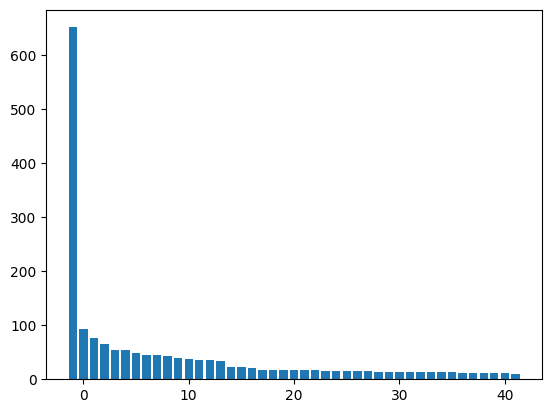

In [16]:
from collections import Counter
import re
import matplotlib.pyplot as plt

some_list = topics

sorted_list = sorted(some_list)
sorted_counted = Counter(sorted_list)

range_length = list(range(max(some_list))) # Get the largest value to get the range.
data_series = {}

for i in range_length:
    data_series[i] = 0 # Initialize series so that we have a template and we just have to fill in the values.

for key, value in sorted_counted.items():
    data_series[key] = value

data_series = pd.Series(data_series)
x_values = data_series.index

# you can customize the limits of the x-axis
# plt.xlim(0, max(some_list))
plt.bar(x_values, data_series.values)

plt.show() 

In [19]:
new_data = []

for x in range(len(topics)):
    new_data += [[moral[x]["story"],moral[x]["moral"],topics[x]]]

In [20]:
from operator import itemgetter
new_data_ = sorted(new_data, key=itemgetter(2))

with open('bertopic_result_1.txt', 'w') as f:
    for line in new_data_:
        f.write(f"{line}\n")

In [8]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,652,-1_to_of_the_we,"[to, of, the, we, and, be, is, you, not, it]",[The next time you see a copy of that touching...
1,0,93,0_life_success_and_you,"[life, success, and, you, to, up, the, in, we,...",[Perhaps the ego of your success has grown in ...
2,1,76,1_parents_children_story_them,"[parents, children, story, them, their, and, c...",[Parents take care of a child in every conditi...
3,2,65,2_friends_friend_friendship_true,"[friends, friend, friendship, true, choose, pr...","[He that has many friends, has no friends. , H..."
4,3,55,3_happiness_happy_have_life,"[happiness, happy, have, life, what, we, our, ...",[That's our problem too. We make unnecessary c...
5,4,54,4_respect_treat_kindness_others,"[respect, treat, kindness, others, everyone, t...",[Treat others the way you want to be treated. ...
6,5,48,5_judge_appearance_by_see,"[judge, appearance, by, see, not, should, we, ...","[Don't judge people by their looks. , Don't ju..."
7,6,45,6_money_wealth_earned_than,"[money, wealth, earned, than, spent, is, more,...",[ we have a right to do what makes us happy an...
8,7,45,7_impossible_dreams_do_not,"[impossible, dreams, do, not, no, propose, sub...","[Impossible things we cannot hope to attain, a..."
9,8,44,8_good_around_do_turn,"[good, around, do, turn, mistakes, deserves, y...","[What goes around comes around. you do good,..."


In [12]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,There are many who pretend to despise and beli...,-1,-1_to_of_the_we,"[to, of, the, we, and, be, is, you, not, it]",[The next time you see a copy of that touching...,to - of - the - we - and - be - is - you - not...,0.000000,False
1,Expect no reward for serving the wicked.,31,31_wicked_serving_reward_expect,"[wicked, serving, reward, expect, no, the, mis...","[In serving the wicked, expect no reward, and ...",wicked - serving - reward - expect - no - the ...,1.000000,True
2,A kindness is never wasted.,4,4_respect_treat_kindness_others,"[respect, treat, kindness, others, everyone, t...",[Treat others the way you want to be treated. ...,respect - treat - kindness - others - everyone...,0.832151,False
3,We are often of greater importance in our own ...,-1,-1_to_of_the_we,"[to, of, the, we, and, be, is, you, not, it]",[The next time you see a copy of that touching...,to - of - the - we - and - be - is - you - not...,0.000000,False
4,Our best blessings are often the least appreci...,-1,-1_to_of_the_we,"[to, of, the, we, and, be, is, you, not, it]",[The next time you see a copy of that touching...,to - of - the - we - and - be - is - you - not...,0.000000,False
...,...,...,...,...,...,...,...,...
1774,When you quarrel someone else gains.,34,34_fight_two_gains_quarrel,"[fight, two, gains, quarrel, else, face, big, ...","[When we face problems in our life, we complai...",fight - two - gains - quarrel - else - face - ...,1.000000,False
1775,"What goes around comes around. you do good, ...",8,8_good_around_do_turn,"[good, around, do, turn, mistakes, deserves, y...","[What goes around comes around. you do good,...",good - around - do - turn - mistakes - deserve...,1.000000,True
1776,Work with honesty and sincerity because lazine...,39,39_honesty_policy_best_sincerity,"[honesty, policy, best, sincerity, honest, rew...","[Honesty is the best policy. , Honesty is the ...",honesty - policy - best - sincerity - honest -...,1.000000,False
1777,Never judge anyone by their outlook.,5,5_judge_appearance_by_see,"[judge, appearance, by, see, not, should, we, ...","[Don't judge people by their looks. , Don't ju...",judge - appearance - by - see - not - should -...,1.000000,False
